## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'

# 5. 데이터 분석
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>

# 5.0. [데이터 분석을 위한 준비과정] 데이터 합치기

#### [5.0.1] 데이터 합치기
* 지금까지 1~4에서 준비한 데이터 파일
    * 버스 정류장 데이터 - df_seoul_bus_station.csv
    * 유동인구 데이터 - df_seoul_moving.csv
    * 구별 등록 인구 데이터 - df_seoul_people.csv
    * 구별 상권 데이터 - df_seoul_business.csv
* 아래 제시되는 'standard' 데이터 프레임을 기준으로 활용하여, 지금까지 1~4에서 준비한 데이터를 각각 불러와서 합쳐 주세요.
* 이후에는 이 합쳐진 데이터 프레임을 기반으로 미션을 수행하기 위한 분석을 진행합니다.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 데이터 합치기 진행 시, 아래 제시되는 정보를 활용하세요.
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [5]:
standard.head()

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구


In [7]:
data = pd.read_csv('df_temp_ver1.csv')
data.head()

,도착 시군구 코드,자치구,버스정류장개수,노선개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),...,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,종사자총합
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,...,5912,646,889,480,3613,962,1413,382,1982,16494
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,...,6414,333,1152,816,3542,24248,982,175,2121,40018
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,...,2987,466,1214,777,2076,317,1332,573,1184,11449
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,...,2785,1161,1453,851,1859,1572,621,1494,1545,15868
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,...,2861,985,1313,1337,1887,687,1577,1646,1678,15715


In [9]:
data.columns

Index(['도착 시군구 코드', '자치구', '버스정류장개수', '노선개수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '평균 이동 시간(분)', '이동인구(평균)', '평균 이동 시간의 합(분)', '이동인구(합)', '세대',
       '인구', '세대당인구', '택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업',
       '두발미용업', '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점',
       '종사자총합'],
      dtype='object')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

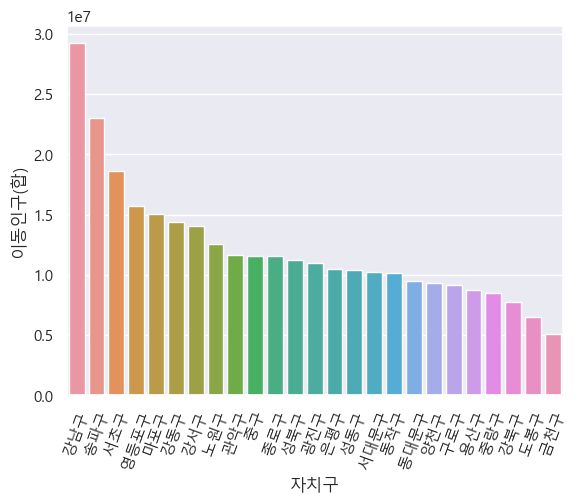

In [31]:
sorted_data = data.sort_values(by='이동인구(합)', ascending=False)
sns.barplot(x='자치구', y= '이동인구(합)', data=sorted_data)

plt.xticks(rotation=70)
plt.show()

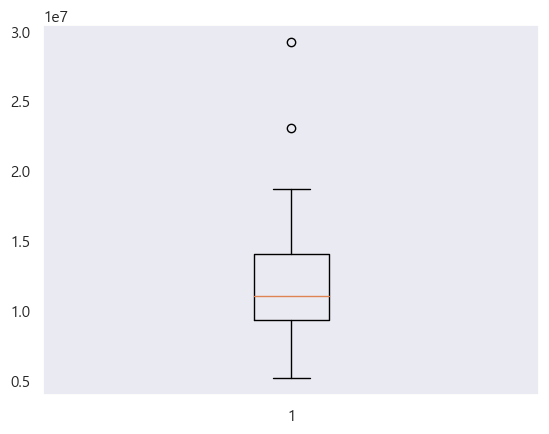

In [32]:
plt.boxplot(data['이동인구(합)'])
plt.grid()
plt.show()

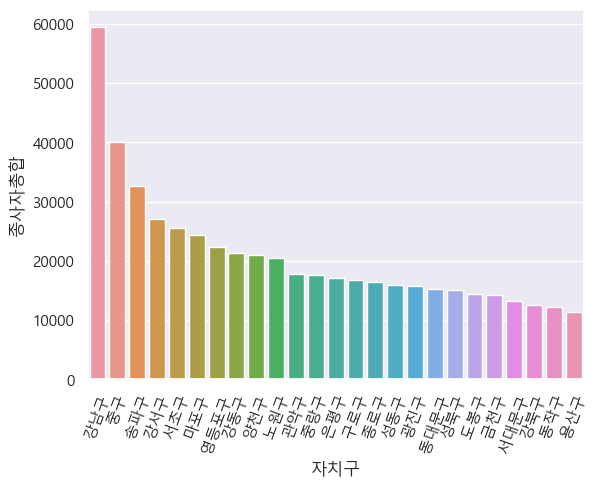

In [35]:
sorted_data = data.sort_values(by='종사자총합', ascending=False)
sns.barplot(x='자치구', y= '종사자총합', data=sorted_data)

plt.xticks(rotation=70)
plt.show()

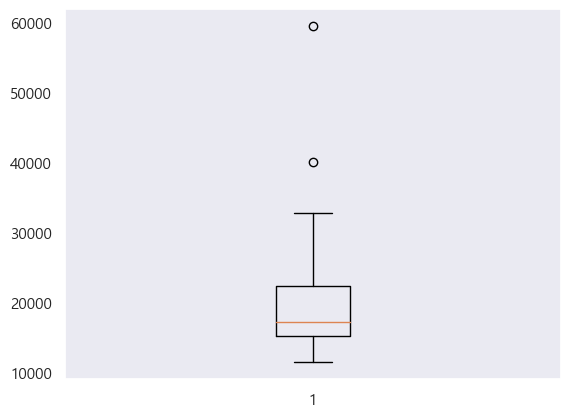

In [37]:
plt.boxplot(data['종사자총합'])
plt.grid()
plt.show()

In [42]:
data['승하차총승객수'] = data['승차총승객수'] + data['하차총승객수']
data['승하차총승객수']

0     10674329
1      7375607
2      8276451
3      5554018
4      5502859
5     10355944
6      7533464
7     12467662
8      9496964
9      6515726
10     8646019
11    10324159
12    11660459
13    10046057
14     7860345
15     9333911
16     9673189
17     7358588
18    11523086
19    10426550
20    15448295
21    14199280
22    15599696
23    11245230
24     5720559
Name: 승하차총승객수, dtype: int64

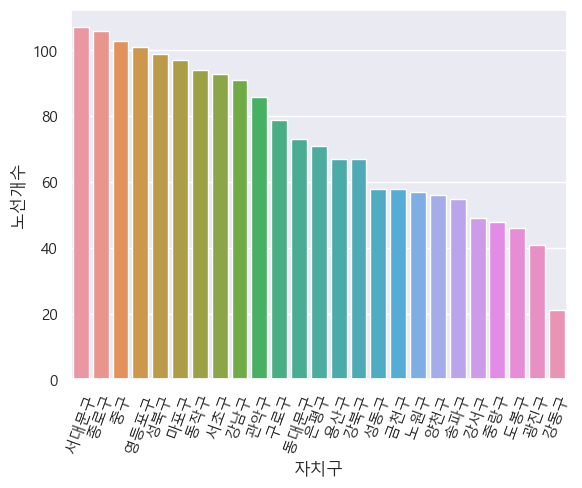

In [47]:
sorted_data = data.sort_values(by='노선개수', ascending=False)
sns.barplot(x='자치구', y= '노선개수', data=sorted_data)

plt.xticks(rotation=70)
plt.show()

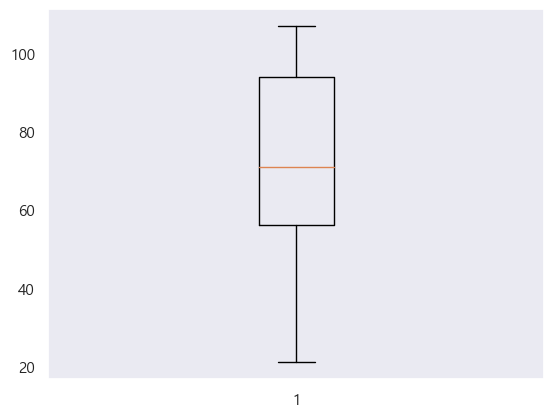

In [48]:
plt.boxplot(data['노선개수'])
plt.grid()
plt.show()

In [45]:
data.columns

Index(['도착 시군구 코드', '자치구', '버스정류장개수', '노선개수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '평균 이동 시간(분)', '이동인구(평균)', '평균 이동 시간의 합(분)', '이동인구(합)', '세대',
       '인구', '세대당인구', '택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업',
       '두발미용업', '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점',
       '종사자총합', '승하차총승객수'],
      dtype='object')

,도착 시군구 코드,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99


,자치구,남자,여자,계
0,종로구,74018,79666,153684
1,중구,63869,67581,131450
2,용산구,114571,121947,236518
3,성동구,141662,149947,291609
4,광진구,169525,183585,353110


,Unnamed: 0,자치구,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,2,종로구,5912,3613,1413
1,20,중구,6414,3542,982
2,36,용산구,2987,2076,1332
3,53,성동구,2785,1859,621
4,71,광진구,2861,1887,1577


,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,114571,121947,236518,36,2987,2076,1332
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,8887140,17449273.95,141662,149947,291609,53,2785,1859,621
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,169525,183585,353110,71,2861,1887,1577


C:\Users\User\AppData\Local\Temp\ipykernel_17540\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.533514,0.610548,0.235541,0.473119,0.697314,0.675779,0.687074,0.999351,0.308156,0.267956,0.318339
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374723,0.356947,0.355635,0.550032,0.580536,0.566615,0.433391,0.146445,0.209808,0.315121
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,0.226437,-0.294351,-0.268906,-0.281536,-0.085764,0.413556,0.425180,0.262016
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,0.576553,0.359532,0.368034,0.364433,0.426003,0.574076,0.530386,0.493852
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,0.558699,0.384499,0.390470,0.388119,0.426352,0.538578,0.494266,0.485755
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.382202,-0.079733,0.140483,0.067920,-0.255715,-0.282278,-0.269854,0.015474,0.257629,0.204745,0.220043
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.356171,-0.072466,0.148381,0.062384,-0.192074,-0.221558,-0.207643,0.026276,0.212645,0.160374,0.227213
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,1.000000,0.373091,-0.141914,0.095727,0.644669,0.631852,0.638885,0.544275,-0.128780,-0.181316,-0.034993
이동인구평균,0.610548,0.374723,-0.003649,0.474049,0.463898,-0.079733,-0.072466,0.373091,1.000000,0.808313,0.951399,0.681313,0.708455,0.696328,0.617066,0.745931,0.736411,0.615303
총 이동시간,0.235541,0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,-0.141914,0.808313,1.000000,0.923298,0.350985,0.393565,0.373570,0.236683,0.816341,0.835772,0.655550


# 5.1.가설 수립

## 5.1.1.가설 수립 
+ 어떤 데이터를 label 데이터(y)로 해야 할 지 생각해보아 정하세요.
    * 설정한 가설에 따라(가설 마다) y는 다를 수 있습니다. 개인/조 마다 y는 다를 수 있습니다.
+ 가설의 개수는 제한이 없습니다. (조 별로 적어도 3개 이상 설정하세요.)
+ 가설 예시
    * 가설 1 정류장 수와 승차 총 승객수
        * H0 : 정류장 수와 승차 총 승객수는 연관이 없다
        * H1 : 정류장 수와 승차 총 승객수는 연관이 있다
    * 가설 2 노선 수와 총 이동시간
        * H0 : 노선 수와 총 이동시간은 연관이 없다
        * H1 : 노선 수와 총 이동시간은 연관이 있다
    * 가설 3 정류장 수와 이동인구(합)
    * 가설 4 노선 수와 평균 이동 시간
    * 가설 5 노선 수와 커피전문점 이용자수

In [96]:
# 아래에 코드를 작성하고 결과를 확인합니다.



## 5.1.2.단변량 분석

* 아래 제시되는 내용들을 참고하여 단변량 분석을 진행합니다. 
    * 변수의 비즈니스 의미  
    * 변수가 숫자형인지 범주형인지 판단하여 진행
    * 전처리가 필요한지 확인하고 필요 시 진행: NaN 존재 여부 및 조치 방안, 가변수화 대상여부  
    * 기초통계량 분석
    * 데이터 분포 분석  
    * 위 정보로부터 파악한 내용을 비즈니스 관점에서 정리  
    * 추가 분석해볼 사항 도출하여 추가 분석 진행
* 이 프로젝트에서 비즈니스 관점이라 함은 데이터를 분석하는 목적이 어디에 있는가 하는 것을 고려하자는 것입니다.
    * 즉, "서울시 내 어느 자치구에 버스노선 추가가 필요한지를 분석하여 합리적으로 결정하려는 목적"을 가지고 데이터에 근거하기 위해 데이터를 분석하고 정리해야 한다는 의미입니다.

In [97]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


### 2)

### 3)

## 5.1.3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 시각화와 수치화(가설검정)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1
* p-value 기준 판단 기준
    * P-value < 0.05이면, 두 변수 간에 관계가 있다. (상관계수가 의미가 있다.)
    * P-value >= 0.05이면, 두 변수 간에 관계가 없다. (상관계수가 의미가 없다.)

In [98]:
import scipy.stats as spst

# 아래에 코드를 작성하고 결과를 확인합니다.


상관계수 : 0.5666813370974585, p-value : 0.003141977397117322


PearsonRResult(statistic=0.38833248798056735, pvalue=0.05507091940045923)

PearsonRResult(statistic=0.42518048108643286, pvalue=0.03410811239601253)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,172318,180274,352592,87,3566,1472,1082,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,250450,249886,500336,340,3689,2049,1672,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413,0.638150


,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,...,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1,비율2
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,...,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382,125.120308
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,21101460.33,227891,237206,465097,432,3388,1660,1349,1.276793,126.506024
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,...,34837613.05,321963,346298,668261,404,5760,3372,1469,0.735588,163.107948
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,...,21839762.06,277797,300629,578426,257,4584,2530,1709,1.209122,193.675889
13,11140,마포구,562,97,5088461,4957596,103.907639,101.235343,22.044201,54.884906,...,23639807.30,176886,201743,378629,221,4705,4475,2559,1.104460,216.759777


## 5.1.4.관계 정리

### 1) 강한 관계의 변수

In [103]:
# 강한 관계의 변수는 무엇인가요?
# 예) 정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

In [104]:
# 중간 관계의 변수는 무엇인가요?
# 예) 노선수 - 커피전문점.1(종사자수)

## 5.1.5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇인가요?

In [105]:
# 솔루션 도출
# 예) 강남구 - 중구 - 동대문구 - 관악구에 필요합니다